<a href="https://colab.research.google.com/github/excuation/Bubble_Game/blob/main/currencyclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import zipfile
import os
import shutil
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2

# Step 1: Extract ZIP File
zip_path = "/content/Test.zip"  # Path to your dataset
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extracted files:", os.listdir(extract_path))  # Check extracted contents

# Step 2: Split Dataset into Train (80%), Validation (10%), and Test (10%) Sets
train_dir = "/content/train"
val_dir = "/content/validation"
test_dir = "/content/test"

if not os.path.exists(train_dir):
    os.makedirs(train_dir)
    os.makedirs(val_dir)
    os.makedirs(test_dir)

    for category in os.listdir(extract_path):
        category_path = os.path.join(extract_path, category)
        if os.path.isdir(category_path):
            images = os.listdir(category_path)
            num_images = len(images)

            train_split = int(0.8 * num_images)
            val_split = int(0.9 * num_images)

            for i, img in enumerate(images):
                src = os.path.join(category_path, img)

                if i < train_split:
                    dest_folder = os.path.join(train_dir, category)
                elif i < val_split:
                    dest_folder = os.path.join(val_dir, category)
                else:
                    dest_folder = os.path.join(test_dir, category)

                os.makedirs(dest_folder, exist_ok=True)
                shutil.move(src, dest_folder)

print("✅ Dataset split into train (80%), validation (10%), and test (10%) sets!")

# Step 3: Set Up Image Data Generators (With Strong Data Augmentation)
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Step 4: Define an Optimized CNN Model (Deep Network)
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(256, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

# Step 5: Compile Model with a Lower Learning Rate
optimizer = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 6: Train Model (Increase Epochs)
epochs = 50

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

# Step 7: Evaluate Model on Validation Data
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"✅ Validation Accuracy: {val_accuracy * 100:.2f}%")

# Step 8: Evaluate Model on Test Data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"✅ Test Accuracy: {test_accuracy * 100:.2f}%")

# Step 9: Save Model for Future Use
model.save("currency_classifier.keras")
print("✅ Model saved successfully!")


✅ Extracted files: ['2Thousandnote', 'Twentynote', 'Fiftynote', '5Hundrednote', 'Tennote', '1Hundrednote', '2Hundrednote']
✅ Dataset split into train (80%), validation (10%), and test (10%) sets!
Found 28 images belonging to 7 classes.
Found 7 images belonging to 7 classes.
Found 7 images belonging to 7 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.1071 - loss: 2.9430 - val_accuracy: 0.1429 - val_loss: 2.9169
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - accuracy: 0.2500 - loss: 2.9146 - val_accuracy: 0.0000e+00 - val_loss: 2.9070
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.0714 - loss: 2.8900 - val_accuracy: 0.1429 - val_loss: 2.8948
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step - accuracy: 0.1786 - loss: 2.8655 - val_accuracy: 0.1429 - val_loss: 2.8840
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step - accuracy: 0.0714 - loss: 2.8732 - val_accuracy: 0.1429 - val_loss: 2.8743
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step - accuracy: 0.2143 - loss: 2.8345 - val_accuracy: 0.1429 - val_loss: 2.8660
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step - accuracy: 0.1786 - loss: 2.8900 - val_accuracy: 0.1429 - val_loss: 2.8591
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - accuracy: 0.2143 - loss: 2.8502 - val_accuracy: 0.1429 - val_loss

In [13]:
test_loss, test_acc = model.evaluate(validation_generator)  # Use test_generator if available
print(f"Test Accuracy: {test_acc * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.4286 - loss: 1.5624
Test Accuracy: 42.86%


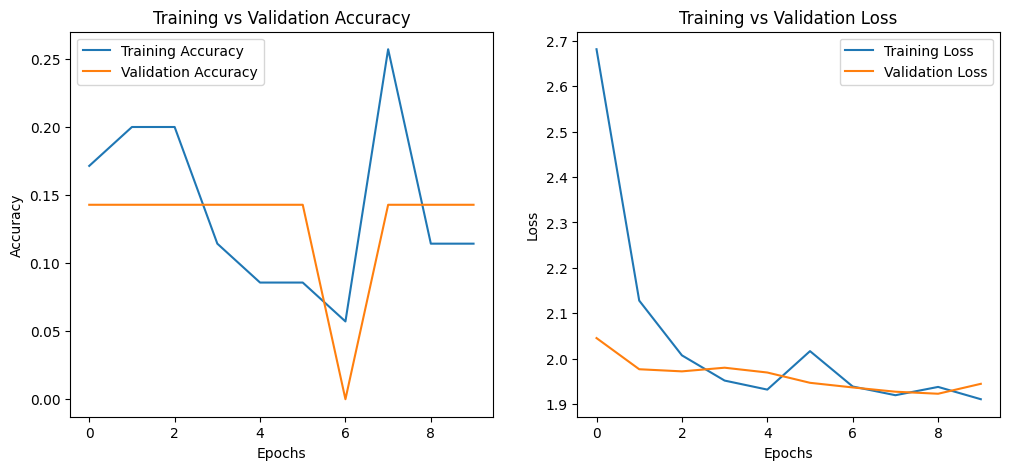

In [3]:
import matplotlib.pyplot as plt

# Get accuracy and loss from training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")

plt.show()
